In [4]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
td = pd.read_csv('train.csv')


In [8]:
td.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
td.shape


(891, 12)

In [10]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
td.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
td = td.drop(columns="Cabin",axis=1)

In [14]:
td['Age'].fillna(td['Age'].mean(),inplace=True)

In [15]:
td[td['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [16]:
td['Embarked'].mode()[0]

'S'

In [17]:
td['Embarked'].fillna(td['Embarked'].mode()[0],inplace = True)

In [18]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
td = td.drop(columns="Name",axis=1)

In [20]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
td.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,male,27.000000,0,0,211536,13.00,S
887,888,1,1,female,19.000000,0,0,112053,30.00,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,male,26.000000,0,0,111369,30.00,C
890,891,0,3,male,32.000000,0,0,370376,7.75,Q


In [23]:
td['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

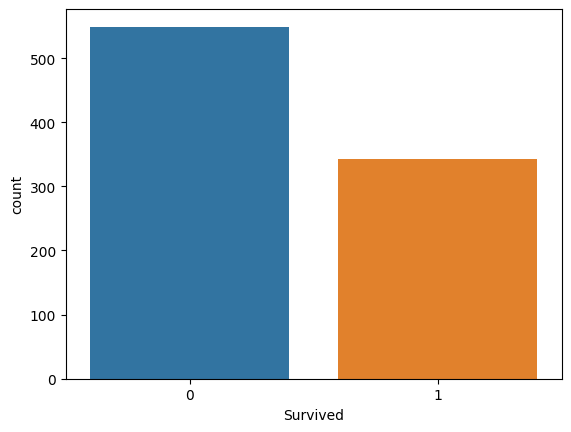

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'td' is your DataFrame and 'Survived' is the column you want to plot
sns.countplot(x='Survived', data=td)



<Axes: xlabel='Sex', ylabel='count'>

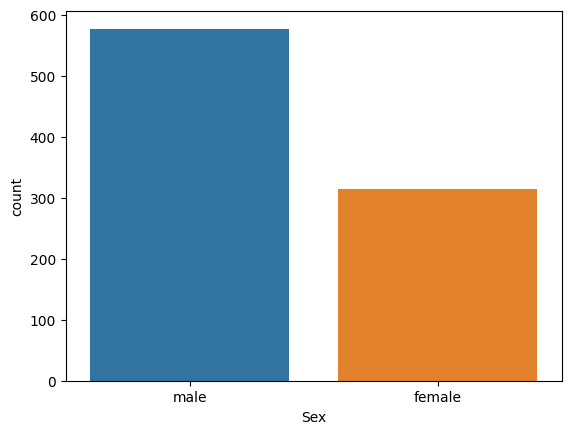

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sex', data=td)



<Axes: ylabel='Survived'>

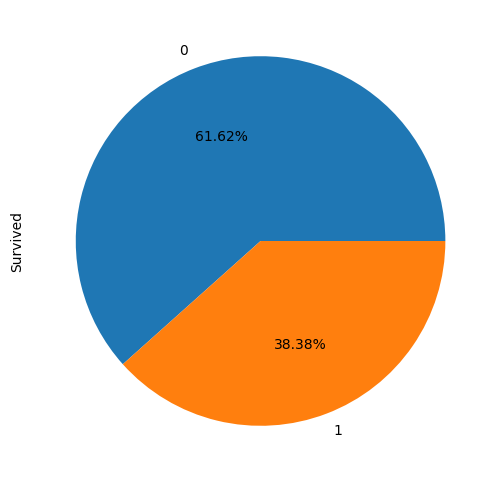

In [40]:
fig = plt.figure(figsize=(6,6))
td['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [42]:
td.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

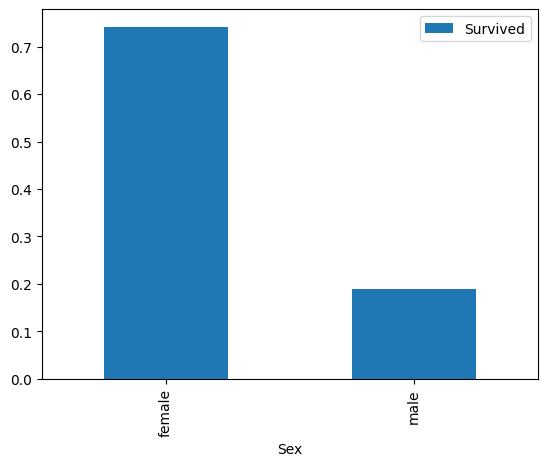

In [43]:
survived_by_sex = td[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

In [44]:
td.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

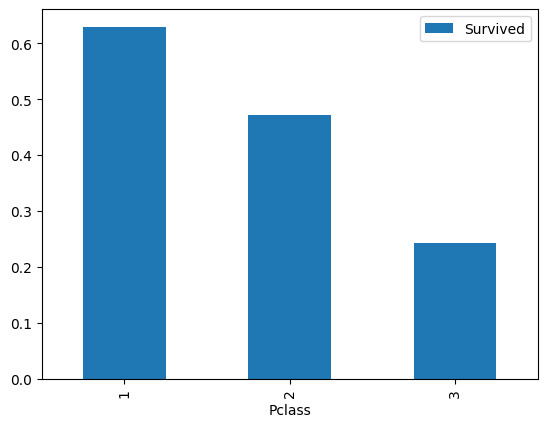

In [45]:
td[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [46]:
td.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()


Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<Axes: xlabel='Pclass,Sex'>

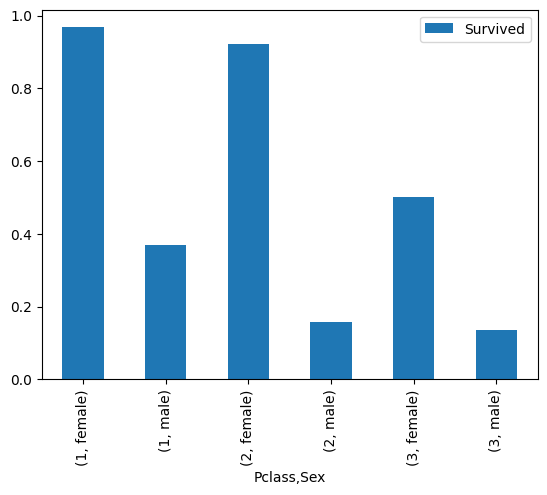

In [47]:
td[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

<ipython-input-53-327c7d1b655d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = td.corr()


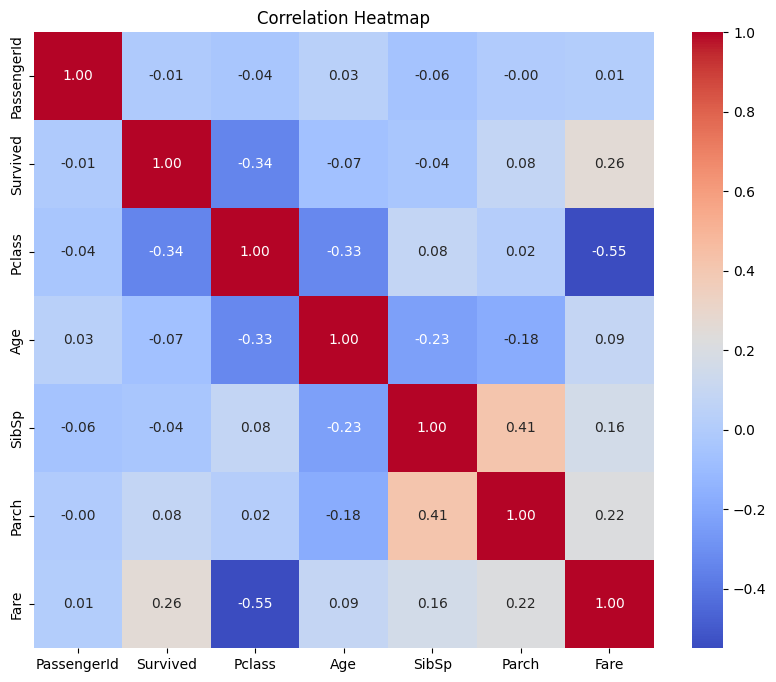

In [53]:
correlation_matrix = td.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

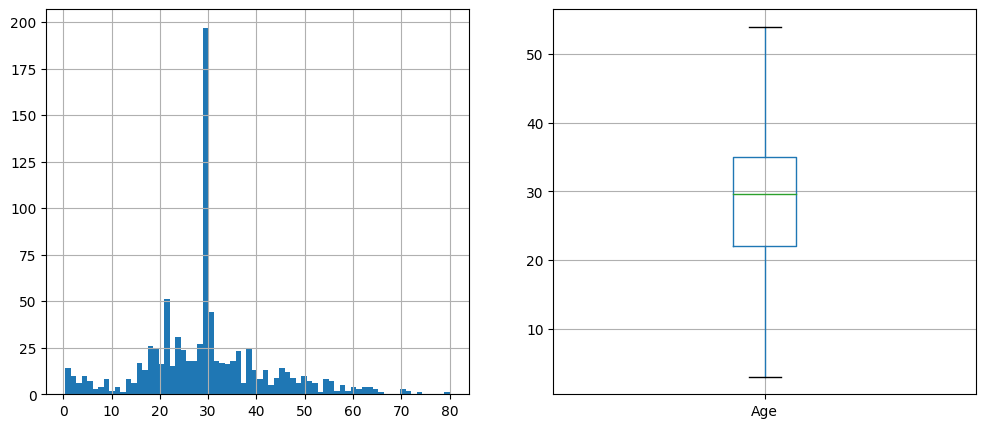

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(121)
td['Age'].hist(bins=70)

plt.subplot(122)
td.boxplot(column='Age', showfliers=False)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


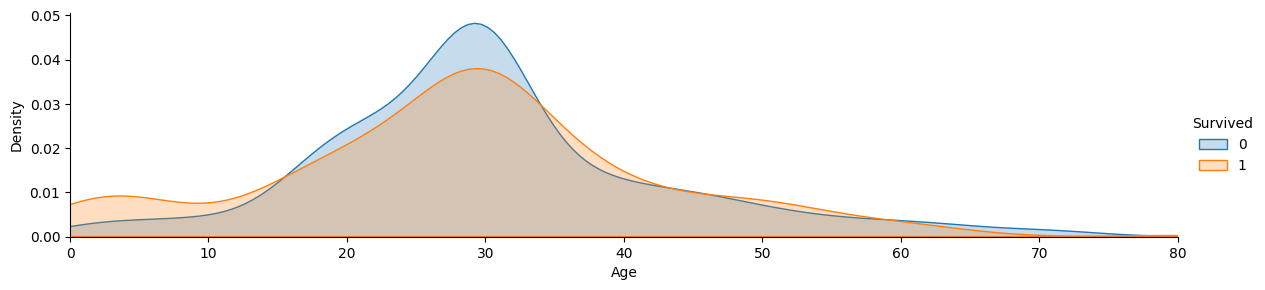

In [52]:
facet = sns.FacetGrid(td,hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, td['Age'].max()))
facet.add_legend()

In [63]:
survival_data = td[['Survived', 'SibSp', 'Parch']]

# Compute the correlation matrix
correlation_matrix = survival_data.corr()

# Print the correlation matrix
print(correlation_matrix)

          Survived     SibSp     Parch
Survived  1.000000 -0.035322  0.081629
SibSp    -0.035322  1.000000  0.414838
Parch     0.081629  0.414838  1.000000


In [64]:
td['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [65]:
td['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [67]:
td.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0


In [68]:
x = td.drop(columns = ['PassengerId','Ticket','SibSp','Parch','Survived'],axis = 1)
y = td['Survived']

In [69]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
x_train.shape

(712, 5)

In [72]:
x_test.shape

(179, 5)

In [73]:
logreg_model = LogisticRegression()

In [74]:
logreg_model.fit(x_train, y_train)

LogisticRegression()

In [75]:
x_train_pred = logreg_model.predict(x_train)


In [76]:
accuracy = accuracy_score(y_train,x_train_pred)

In [77]:
print(f"Accuracy score of Training data: {accuracy:.3f}")


Accuracy score of Training data: 0.788


In [78]:
x_test_pred = logreg_model.predict(x_test)

In [79]:
accuracy2 = accuracy_score(y_test, x_test_pred)
print(f"Model Accuracy of Test data: {accuracy2:.3f}")

Model Accuracy of Test data: 0.793


In [80]:
new_data = pd.DataFrame({
    'Pclass': [1, 3, 2, 1],
    'Sex': [0, 1, 1, 0],
    'Age': [30, 25, 40, 35],
    'Fare': [100, 20, 50, 80],
    'Embarked': [0, 1, 0, 1]
})

# Use the trained model to predict on the new data
predictions = logreg_model.predict(new_data)

# Print the predictions
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[0 1 1 0]


In [81]:
pip install joblib

In [82]:
import joblib

# Assuming you have trained and named your model as 'logreg_model'
joblib.dump(logreg_model, 'trained_model.pkl')

['trained_model.pkl']